# Apurva J. Lawate
### Chennai House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('chennai.csv')

# DATA EXPLORATION 

In [3]:
df.head(10)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [4]:
df.shape

(7109, 19)

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


from above description we can notice that there are some missing values, but we have only values of continous variables

In [6]:
df.describe(include= "all")

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P07224,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [7]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
#we will check for missing values and unique count in each column

#passing list of columns in DataFrame
temp = pd.DataFrame(index=df.columns)

#now we will create 3 columns in temporary 'temp' DataFrame
temp['data_type'] = df.dtypes
temp['null_values'] = df.isnull().sum()
temp['unique_counts'] = df.nunique()

In [9]:
temp

,data_type,null_values,unique_counts
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


# UNIVARIATE ANALYSIS

Text(0.5, 0, 'Sales Price')

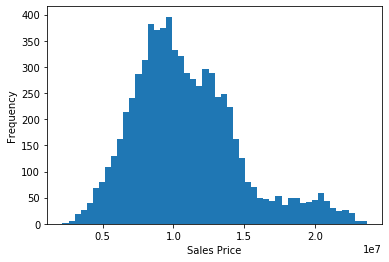

In [10]:
df['SALES_PRICE'].plot.hist(bins = 50)
plt.xlabel('Sales Price')
#In first figure we can see it is right skewed

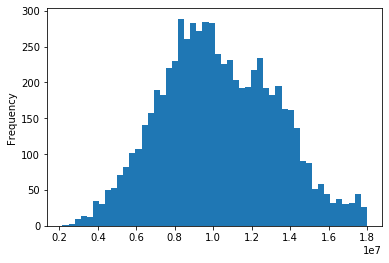

In [11]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins = 50)

Text(0.5, 0, 'Square Feet')

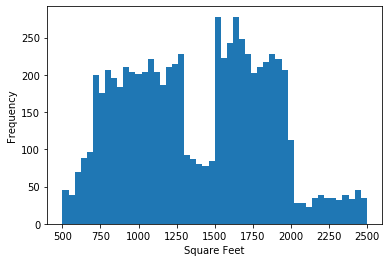

In [12]:
df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Square Feet')

Most houses are within 750 to 1250 square feet or 1500 to 2000 square feet

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'QS_OVERALL')

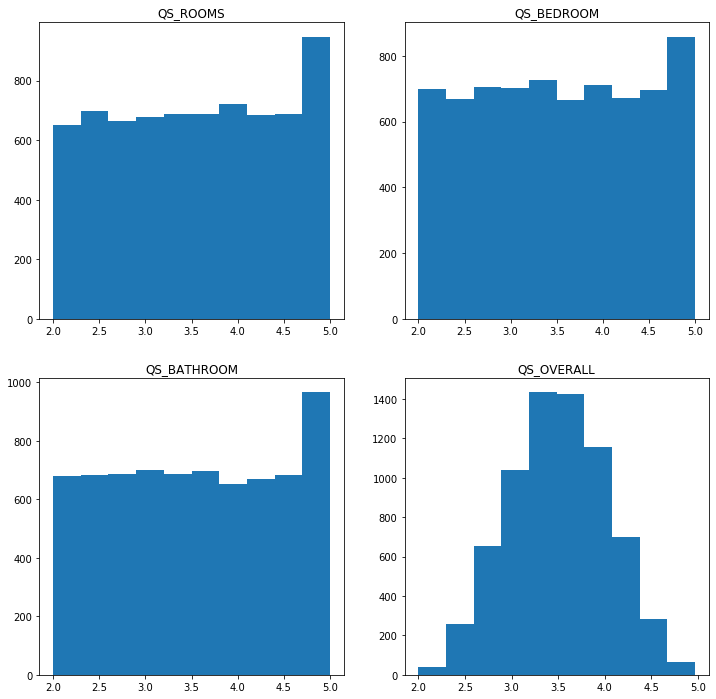

In [13]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(12)
ax[0,0].hist(df['QS_ROOMS'])
ax[0,0].set_title('QS_ROOMS')
ax[0,1].hist(df['QS_BEDROOM'])
ax[0,1].set_title('QS_BEDROOM')
ax[1,0].hist(df['QS_BATHROOM'])
ax[1,0].set_title('QS_BATHROOM')
ax[1,1].hist(df['QS_OVERALL'])
ax[1,1].set_title('QS_OVERALL')

 - The top Left has quality score of **total Rooms**
 - The top Right has quality score of **total BedRooms**
 - The bottom Left has quality score of **total Bathrooms**
 - The bottom Right has overall **quality score**

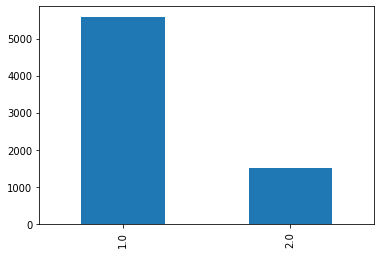

In [14]:
df['N_BATHROOM'].value_counts().plot(kind = 'bar')

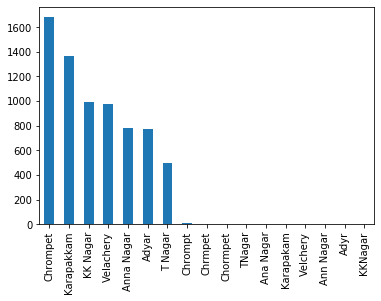

In [15]:
df['AREA'].value_counts().plot(kind = 'bar')

 - It can be noted that there are only 7 unique areas
 - most are just errors during reading data or have really less households

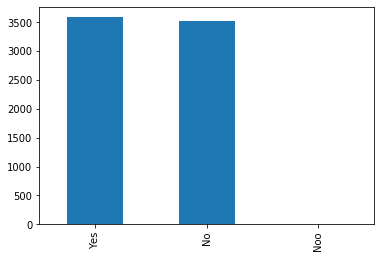

In [16]:
df['PARK_FACIL'].value_counts().plot(kind = 'bar')

 - we need to replace 'Noo' with 'No'

In [17]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

# DATA MANIPULATION

### 1. DROP DUPLICATES

In [18]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


 - There are no duplicates since original dimensions are unchanged

### 2. MISSING VALUES

 - In data exploration we saw the missing values in N_BEDROOM, N_BATHROOM and QS_OVERALL columns
 - We will use mean or median to fill the data of continous variables and Mode for Categorical Variables
 
 *We will not use Dropna() as many rows will be dropped*
 
  **1.** N_BEDROOM is categorical variable
  
  **2.** N_BATHROOM vary based on no of Bedrooms
  
  **3.** QS_OVERALL can be computed by averaging QS_ROOMS,QS_BATHROOM and QS_BEDROOM

In [19]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace = True)

In [20]:
df['N_BEDROOM'].isnull().sum()

0

In [21]:
df.loc[df['N_BATHROOM'].isnull() == True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [22]:
for i in range(0,len(df)):
    if pd.isnull(df['N_BATHROOM'][i]) == True:
        #if 1 bedroom 1 bathroom else 2 bathrooms
        if df['N_BEDROOM'][i] == 1.0:
            df['N_BATHROOM'][i] = 1.0
        else:
            df['N_BATHROOM'][i] = 2.0

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [23]:
df['N_BATHROOM'].isnull().sum()

0

In [24]:
df['N_BATHROOM'].value_counts()

1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

 - Now, we need to fix QS_OVERALL

In [25]:
df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


 - We can see that the QS_OVERALL is nearly equal to (QS_ROOMS+QS_BATHROOM+QS_BEDROOM)/3

In [26]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [27]:
df['QS_OVERALL'] =  df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

In [28]:
df['QS_OVERALL'].isnull().sum()

0

df.isnull().sum()

### 3. FIXING ERRORS IN DATA

 1. We will change the data types of N_BEDROOM, N_ROOM and N_BATHROOM to object since they are categorical and not continous.
 2. We will change the categories in each column that have wrong spelling mistakes.

In [29]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [30]:
df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

In [31]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [32]:
#replacing categories
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('*** value count in',i,'***')
    print(df[i].value_counts())
    print('')

*** value count in AREA ***
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

*** value count in N_BEDROOM ***
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

*** value count in N_BATHROOM ***
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

*** value count in N_ROOM ***
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

*** value count in SALE_COND ***
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

*** value count in PARK_FACIL ***
Yes    3587
No     3520
Noo       2

In [33]:
df['AREA'].replace({'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam',
                   'Ana Nagar':'Anna Nagar','Velchery':'Velachery','Ann Nagar':'Anna Nagar','Adyr':'Adyar','KKNagar':'KK Nagar'},
                  inplace = True)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [34]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [35]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)

In [36]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)

In [37]:
print(df['BUILDTYPE'].value_counts())
print(df['UTILITY_AVAIL'].value_counts())
print(df['STREET'].value_counts())
print(df['PARK_FACIL'].value_counts())

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64
AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64
Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64


# BIVARIATE ANALYSIS

We will try to see if following hypothesis is true with help of Bivariate Analysis
 - Sales price should increase with increase in interior square feet
 - Sales price of house depends on the area where house is located
 - Higher no of rooms,bathrooms or bedrooms should increase price

### 1. SALES PRICE V/S INTERIOR SQUARE FEET

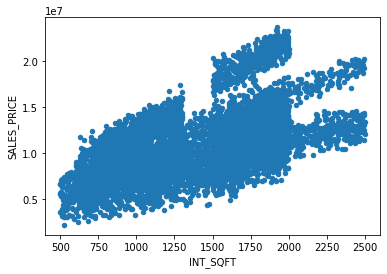

In [38]:
df.plot.scatter('INT_SQFT','SALES_PRICE')

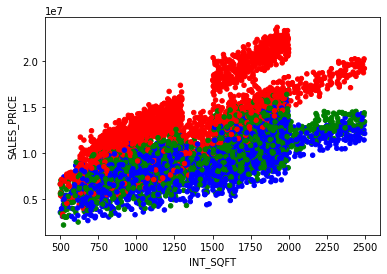

In [39]:
colors = {'Commercial':'red','House':'blue','Others':'green'}
df.plot.scatter('INT_SQFT','SALES_PRICE',c=df['BUILDTYPE'].apply(lambda x: colors[x]))

 - There is linear relation in Interior Sqft and Sales Price
 - Commercials have highest price than 'House' and 'Others' type of category
 - In univariate analysis we found that houses in between 750 and 1250 sqft or 1500 to 2000 sqft were most common, but here we can see they also have high price

### 2. SALES PRICE RELATIONSHIP WITH NO OF BEDROOMS AND NO OF BATHROOMS

In [40]:
df.pivot_table(values='SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


 - A clear trend is visible
 1. Houses with one bedroom have exactly 1 bathroom
 2. Houses with 3 to 4 bedrooms have exactly 2 bathrooms

### 3. OVERALL QUALITY SCORE V/S SALES PRICE

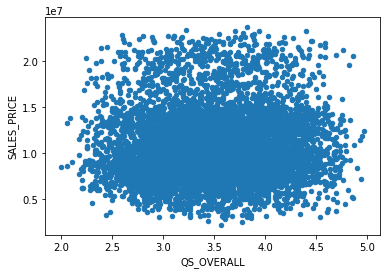

In [41]:
df.plot.scatter('QS_OVERALL','SALES_PRICE')

*No trend detected*

Text(0.5, 1.0, 'QS_OVERALL')

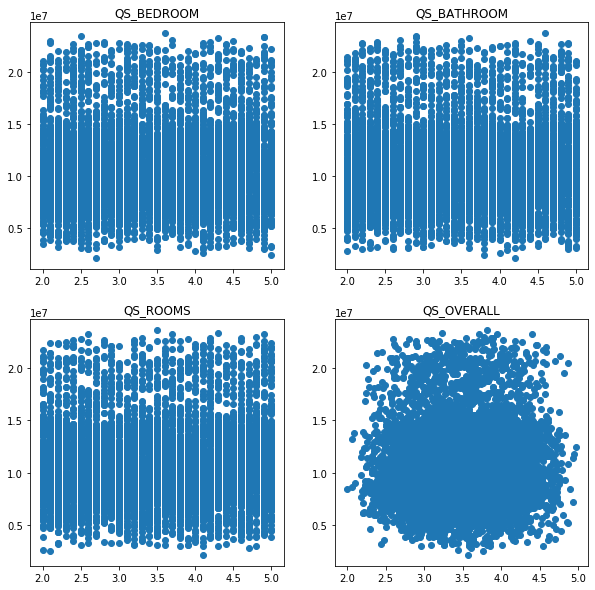

In [42]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(df['QS_BEDROOM'], df['SALES_PRICE'])    # QS_BEDROOM and sale price
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(df['QS_BATHROOM'], df['SALES_PRICE'])   # QS_BATHROOM and price
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(df['QS_ROOMS'], df['SALES_PRICE'])    # QS_ROOMS and sale price
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(df['QS_OVERALL'], df['SALES_PRICE'])    # QS_OVERALL and sale price
axs[1, 1].set_title('QS_OVERALL')

*No trend detected*

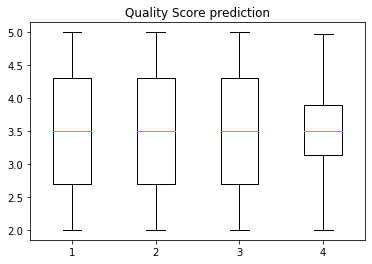

In [43]:
ax = plt.figure().add_subplot(111)
ax.set_title('Quality Score prediction')
#creating box plot
bp = ax.boxplot([df['QS_BEDROOM'],df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_OVERALL']])

### 4. BUILD TYPE AND SALES PRICE

In [44]:
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

In [45]:
temp_df = df.loc[(df['BUILDTYPE'] == 'Commercial') & (df['AREA'] == 'Anna Nagar')]

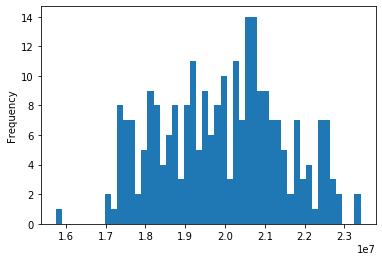

In [46]:
temp_df['SALES_PRICE'].plot.hist(bins=50)

As in above figure we can see commercial houses in Anna Nagar have relatively higher price

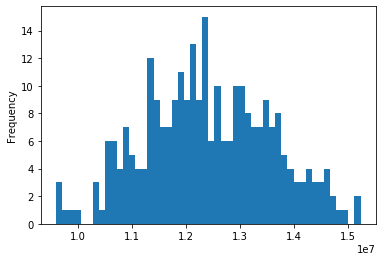

In [47]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

### 5. EFFECT OF PARKING FACILITY ON SALES PRICE BASED ON BUILD TYPE

In [48]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

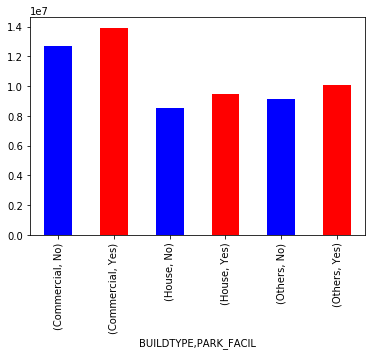

In [49]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
color = {'Yes':'blue','No':'red'}
temp.plot(kind = 'bar', stacked = True, color = df['PARK_FACIL'].apply(lambda x: color[x]))

It's clearly visible that parking facility in any buildtype i.e commercial, house and others increases sales price

#### Now we will see areawise sales price distribution on histogram

In [50]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

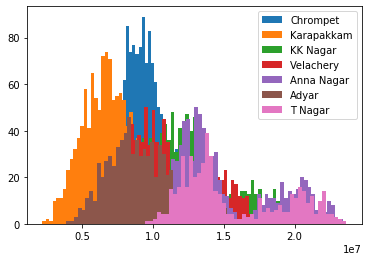

In [51]:
figure, axis = plt.subplots()
arealist = ['Chrompet','Karapakkam','KK Nagar','Velachery','Anna Nagar','Adyar','T Nagar']

for i in arealist:
    tem = df['SALES_PRICE'].loc[df['AREA'] == i]
    axis.hist(tem,label = i,bins = 50)
    plt.legend()

### 6. DISTANCE FROM MAIN ROAD

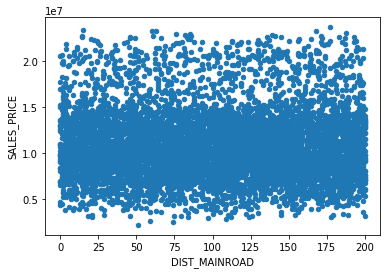

In [52]:
df.plot.scatter('DIST_MAINROAD', 'SALES_PRICE')

### 7. RELATION IN SALES PRICE AND COMMISSION RATE TO AGENTS

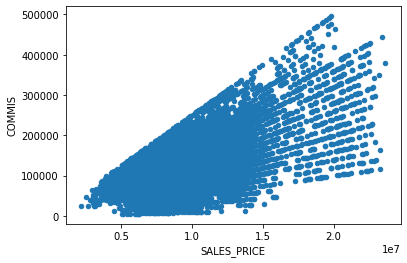

In [53]:
df.plot.scatter('SALES_PRICE', 'COMMIS')

 - In above graph it can be seen that there is linear relatinship between SALES_PRICE and COMMMIS
 
*we will find correlation coefficient between two to test our observations*

In [54]:
df[['SALES_PRICE','COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


 - Correlation is ~0.63 enough to show positive correlation between the two vairables

In [55]:
df.to_csv('chennai_new.csv')

## MODEL DEPLOYMENT AND EVALUATION

In [56]:
df.drop(['PRT_ID'], axis=1, inplace = True)

In [57]:
df = pd.get_dummies(df)

In [58]:
df.head(5)

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,4.0,3.9,4.9,4.330,144400,7600000,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,4.9,4.2,2.5,3.765,304049,21717770,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,70,4.1,3.8,2.2,3.090,92114,13159200,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,4.7,3.9,3.6,4.010,77042,9630290,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,3.0,2.5,4.1,3.290,74063,7406250,0,0,...,0,1,0,0,0,1,0,0,0,0


In [59]:
x = df.drop('SALES_PRICE', axis=1)
y= df['SALES_PRICE']

In [60]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((4976, 48), (2133, 48), (4976,), (2133,))

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [62]:
lreg = LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
pred_train = lreg.predict(train_x)

## MODEL EVALUATION

In [72]:
train_error = np.sqrt(mean_squared_log_error(train_y,pred_train))

In [73]:
pred_test = lreg.predict(valid_x)
valid_error =np.sqrt(mean_squared_log_error(valid_y,pred_test))

In [74]:
print('Training error:', train_error)
print('Validation error:', valid_error)

Training error: 0.09097022122991635
Validation error: 0.09460135021503191


**Root Mean Squared Log Error(RMSLE)**
  
The RMSLE is better metric when there is high variance in range of values in both actual and predicted values.